1.- Definiendo el Problema :
Predicir el precio de las casas

0.- CArgando Librerias para las distintas etapas.

Definicion : 
1-. Si la columna tiene mas de 30% nulos, se elimina
2.- Nulos : Para variables continuas             : reemplzar nulo por la media
3.  Nulos : Para variables categoricas ordinales : por la mediana. Uso Diccionario.
4-. Nulos : Para variables categóricas nominales : por la mediana. Si distribucion < 5, uso diccionario, sino dummies.
5-. Para variables continuas, determinar si se hace bins . Ocupar pd.qcut(df['Variable'], q=numero_de_bins) Por cuartiles.
6.- Para variables continuas numéricas, si Coeficiente Relación si está entre [-0.8 - .0.4] O [0.4 - 0.8] Permance , sino se elimina.
7.- Para viables de cualquier tipo con moda > 90% se eliminam
7.- Diccionario de datos :

In [95]:
cota_moda   = 0.9
cota_nulos  = 0.3
cota_min_cor_neg = -0.8
cota_max_cor_neg = -0.4
cota_min_cor_pos =  0.4
cota_max_cor_pos =  0.8
bins             =  10

In [96]:
#lote de librerias para majejo de de estructuras de datos y visualización.
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import random 

In [97]:
#Lote de Librerias para Preparacion de Datos.

from sklearn.preprocessing  import OneHotEncoder, OrdinalEncoder
from sklearn.impute         import SimpleImputer
from sklearn.compose        import  make_column_transformer
from sklearn.model_selection import train_test_split

In [98]:
from sklearn.linear_model    import LinearRegression
from sklearn                import metrics

In [99]:
#configurando la pantalla praa despliegue de datos.

pd.set_option('display.max_rows',90)
pd.set_option('display.max_columns',90)

In [100]:
data = pd.read_csv('F:/CAPACITACION/MODELO MLEARNING/CURSO DR ARRIGO/Recursos/house-prices-advanced-regression-techniques/train.csv')

2.- Entendiendo, revisando, Preprocesamiento de Datos

In [101]:
columnas = list(data.columns)
nulos    = data.isnull().sum()
dtipos   = list(data.dtypes)
distrib  = list(data.nunique())


In [102]:
# Observado nulos
data_info = pd.DataFrame({'Columna' : columnas , 'Nulos' : nulos , 'Tipo Dato' : dtipos , 'Distribucion' : distrib})
data_info['%Nulos'] = data_info['Nulos']/data.shape[0]
data_info['%Moda']      = data_info.apply(lambda x : data[x.name].value_counts().max()/data.shape[0], axis = 1)

In [103]:
data.shape

(1460, 81)

In [104]:
data_info

,Columna,Nulos,Tipo Dato,Distribucion,%Nulos,%Moda
Id,Id,0,int64,1460,0.000000,0.000685
MSSubClass,MSSubClass,0,int64,15,0.000000,0.367123
MSZoning,MSZoning,0,object,5,0.000000,0.788356
LotFrontage,LotFrontage,259,float64,110,0.177397,0.097945
LotArea,LotArea,0,int64,1073,0.000000,0.017123
Street,Street,0,object,2,0.000000,0.995890
Alley,Alley,1369,object,2,0.937671,0.034247
LotShape,LotShape,0,object,4,0.000000,0.633562
LandContour,LandContour,0,object,4,0.000000,0.897945
Utilities,Utilities,0,object,2,0.000000,0.999315


In [105]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

# Analizando datos, columnas a elinminar y preparando datos.
# Filtro 1  Nulos. Se aplica criterio del 30%. Se elimina columna
# Filtro 2  Moda . Se aplica criterio del 90%  Se elimina columna

In [106]:

data_info['Condicion'] = data_info.apply(
                                         lambda x: 
                                         'Eliminar' if (x['%Nulos'] > cota_nulos or x['%Moda'] > cota_moda)
                                                    else ('Eliminar' if x.name == 'Id' else 'Permanece'),
                                                    axis = 1)


In [107]:
data['LotFrontage'].sum()

84130.0

In [108]:
tipo_variable = pd.read_csv('F:/CAPACITACION/MODELO MLEARNING/CURSO DR ARRIGO/Recursos/house-prices-advanced-regression-techniques/variables.csv', sep=';')
tipo_variable.set_index('Id', inplace = True)
tipo_variable

,Tipo
Id,
1stFlrSF,Numerica
2ndFlrSF,Numerica
3SsnPorch,Numerica
Alley,Nominal
BedroomAbvGr,Numerica
BldgType,Nominal
BsmtCond,Ordinal
BsmtExposure,Ordinal
BsmtFinSF1,Numerica


In [109]:
data_info = pd.concat([data_info, tipo_variable], axis=1, join='outer')

In [110]:
data_info['Preparacion1']  = data_info.apply(lambda x:
                            'Nada'     if x['Tipo']   == 'Ordinal' and x['Tipo Dato'] in ('int64','float64')
                                   else (
                            'map-dic'  if x['Tipo']   == 'Ordinal' and x['Tipo Dato'] == 'object'
                                   else (
                            'dummies'  if x['Tipo']  == 'Nominal' and x['Tipo Dato']  == 'object'
                                   else (
                            'Nada'     if x['Tipo']   == 'Nominal' and x['Tipo Dato'] in ('int64','float64')
                                   else (
                            'bins-10'  if x['Tipo']   == 'Numerica' and x['Distribucion'] > 20 else 'Nada' 
                                         )))), 
                                     axis= 1
                                        )

In [111]:
data_info

,Columna,Nulos,Tipo Dato,Distribucion,%Nulos,%Moda,Condicion,Tipo,Preparacion1
Id,Id,0,int64,1460,0.000000,0.000685,Eliminar,Numerica,bins-10
MSSubClass,MSSubClass,0,int64,15,0.000000,0.367123,Permanece,Nominal,Nada
MSZoning,MSZoning,0,object,5,0.000000,0.788356,Permanece,Nominal,dummies
LotFrontage,LotFrontage,259,float64,110,0.177397,0.097945,Permanece,Numerica,bins-10
LotArea,LotArea,0,int64,1073,0.000000,0.017123,Permanece,Numerica,bins-10
Street,Street,0,object,2,0.000000,0.995890,Eliminar,Nominal,dummies
Alley,Alley,1369,object,2,0.937671,0.034247,Eliminar,Nominal,dummies
LotShape,LotShape,0,object,4,0.000000,0.633562,Permanece,Nominal,dummies
LandContour,LandContour,0,object,4,0.000000,0.897945,Permanece,Nominal,dummies
Utilities,Utilities,0,object,2,0.000000,0.999315,Eliminar,Nominal,dummies


Ahora agregamos la funcion de complemento para los nulos y el datoa incluir en aquellas columnas que quedan con nulos.

In [112]:
columnas_a_eliminar = list(data_info.loc[data_info['Condicion'] == 'Eliminar']['Columna'].values)

data      = data.drop(columns=columnas_a_eliminar)
data_info = data_info.drop(index=columnas_a_eliminar)

data2 = data.copy()




In [113]:
columnas = list(data.columns)

# Agregando la metrica
data_info['Metrica_Nulo']  = data_info.apply(lambda x : 'moda'      if x['Tipo'] == 'Ordinal' or x['Tipo'] == 'Nominal' 
                                                                else 'media'
                                                                ,axis=1)
#Agrendao el valor asociado a la metrica.
data_info['Valor_Nulo']     = data_info.apply(lambda x : 
                                         data[x.name].mode()[0] if x['Condicion'] != 'Eliminar' and (x['Tipo'] in ['Ordinal','Nominal']) 
                                                                else (
                                         data[x.name].mean()    if x['Condicion'] != 'Eliminar' else 'None')
                                                                ,axis=1)

In [114]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,3.000000,2.000000,8.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,12.000000,2010.000000,755000.000000


Trasnformacion de Datos de acuerdo a matriz directriz.
Paso 1 transformar los campos nulos según direcctriz

In [115]:

data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
GarageQual   

In [116]:
columnas_con_nulos = list(data.columns[data.isnull().any()] )#.tolist()


In [117]:
for columna in columnas_con_nulos:
    print(columna)
    if   (data_info.loc[columna,'Tipo'] in ['Ordinal','Nominal']):
           #data[columna].fillna(data[columna].mode()[0], inplace=True)
           data.fillna({columna : data[columna].mode()[0]}, inplace=True)
    
    else : #data[columna].fillna(data[columna].mean(), inplace=True)
           data[columna] = data[columna].fillna(data[columna].mean())
  

LotFrontage
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
GarageType
GarageYrBlt
GarageFinish
GarageQual


In [118]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,Attchd,2003.0,RFn,2,548,TA,0,61,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,Attchd,1976.0,RFn,2,460,TA,298,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,Attchd,2001.0,RFn,2,608,TA,0,42,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Detchd,1998.0,Unf,3,642,TA,0,35,272,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,Attchd,2000.0,RFn,3,836,TA,192,84,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Lvl,Inside,Gilbert,Norm,1Fam,2Story,6,5,1999,2000,Gable,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,Ex,953,694,1647,0,2,1,3,TA,7,1,Attchd,1999.0,RFn,2,460,TA,0,40,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Reg,Lvl,Inside,NWAmes,Norm,1Fam,1Story,6,6,1978,1988,Gable,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,TA,2073,0,2073,1,2,0,3,TA,7,2,Attchd,1978.0,Unf,2,500,TA,349,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Reg,Lvl,Inside,Crawfor,Norm,1Fam,2Story,7,9,1941,2006,Gable,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,Ex,1188,1152,2340,0,2,0,4,Gd,9,2,Attchd,1941.0,RFn,1,252,TA,0,60,0,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Reg,Lvl,Inside,NAmes,Norm,1Fam,1Story,5,6,1950,1996,Hip,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gd,1078,0,1078,1,1,0,2,Gd,5,0,Attchd,1950.0,Unf,1,240,TA,366,0,112,4,2010,WD,Normal,142125


In [119]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
MoSold           0
YrSold      

In [120]:
data.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,3.000000,2.000000,8.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,12.000000,2010.000000,755000.000000


VISUALIZANDO DATOS

In [391]:
#  VISUALIZANDO LOS DATOS 
#
# Ajustar espacio entre subgráficos
#plt.figure(figsize=(10,8))
#plt.subplots_adjust(hspace=0.5)  # Ajustar espacio vertical subgráficos

variables = list(data.columns)
prefijo = ''
for variable in variables:
    #displot de seeaborn
    #print(data[variable].dtype, "         ", variable)
    #print(data[variable].value_counts(dropna=False))
    
    if data[variable].dtype != 'object':
        sns.displot(data[variable])
        plt.title('Distribucion :'+ variable)
        plt.xlabel(variable+' Numero',fontsize = 16)
        plt.ylabel('Frecuencia',fontsize = 16)
        prefijo = 'NU-'
    else :
      #counplot de seeaborn
        sns.catplot(x = variable, kind='count' , data=data )
        plt.title('Distribucion :'+ variable)
        plt.xlabel(variable + ' Object',fontsize = 16)
        plt.ylabel('Frecuencia',fontsize = 16)
        prefijo = 'CA-'
    
   # Guardar el gráfico como una imagen con un nombre descriptivo
    plt.savefig(f'F:/CAPACITACION/MODELO MLEARNING/CURSO DR ARRIGO/Recursos/house-prices-advanced-regression-techniques/{prefijo}{variable}.png')

    # Cerrar la figura para liberar memoria
    plt.close()
    sec = sec + 1
 
  

D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

In [290]:
"""
variables = list(data.columns)
prefijo = ''
for variable in variables:
        
    if data[variable].dtype != 'object':
        cor  = data[variable].corr(data['SalePrice'])
        data_info['Coef'] = cor 
        # Suponiendo que df es tu DataFrame
        plt.figure(figsize=(8, 6))
        plt.scatter(data[variable], df['SalePrice'], alpha=0.5)
        plt.title(f'Diagrama de Dispersión entre {variable} y SalePrice')
        plt.xlabel(variable)
        plt.ylabel('Precio Venta')
        plt.grid(True)
        plt.annotate(f'Coeficiente de correlación: {cor:.2f}', 
             xy=(0.5, 0.9), 
             xycoords='axes fraction', 
             fontsize=12, 
             ha='center', 
             va='center', 
             bbox=dict(boxstyle="round", fc="white", ec="gray", lw=0.5))
        plt.show()
        prefijo = 'CA-'
         # Guardar el gráfico como una imagen con un nombre descriptivo
        plt.savefig(f'F:/CAPACITACION/MODELO MLEARNING/CURSO DR ARRIGO/Recursos/house-prices-advanced-regression-techniques/COR-{prefijo}{variable}.png')

         # Cerrar la figura para liberar memoria
        plt.close()
"""    





'\nvariables = list(data.columns)\nprefijo = \'\'\nfor variable in variables:\n        \n    if data[variable].dtype != \'object\':\n        cor  = data[variable].corr(data[\'SalePrice\'])\n        data_info[\'Coef\'] = cor \n        # Suponiendo que df es tu DataFrame\n        plt.figure(figsize=(8, 6))\n        plt.scatter(data[variable], df[\'SalePrice\'], alpha=0.5)\n        plt.title(f\'Diagrama de Dispersión entre {variable} y SalePrice\')\n        plt.xlabel(variable)\n        plt.ylabel(\'Precio Venta\')\n        plt.grid(True)\n        plt.annotate(f\'Coeficiente de correlación: {cor:.2f}\', \n             xy=(0.5, 0.9), \n             xycoords=\'axes fraction\', \n             fontsize=12, \n             ha=\'center\', \n             va=\'center\', \n             bbox=dict(boxstyle="round", fc="white", ec="gray", lw=0.5))\n        plt.show()\n        prefijo = \'CA-\'\n         # Guardar el gráfico como una imagen con un nombre descriptivo\n        plt.savefig(f\'F:/CAPACITAC

PREPARANDO DATOS DUMMIES

In [30]:
data_info

,Columna,Nulos,Tipo Dato,Distribucion,%Nulos,%Moda,Condicion,Tipo,Preparacion1,Metrica_Nulo,Valor_Nulo
MSSubClass,MSSubClass,0,int64,15,0.000000,0.367123,Permanece,Nominal,Nada,moda,20
MSZoning,MSZoning,0,object,5,0.000000,0.788356,Permanece,Nominal,dummies,moda,RL
LotFrontage,LotFrontage,259,float64,110,0.177397,0.097945,Permanece,Numerica,bins-10,media,70.049958
LotArea,LotArea,0,int64,1073,0.000000,0.017123,Permanece,Numerica,bins-10,media,10516.828082
LotShape,LotShape,0,object,4,0.000000,0.633562,Permanece,Nominal,dummies,moda,Reg
LandContour,LandContour,0,object,4,0.000000,0.897945,Permanece,Nominal,dummies,moda,Lvl
LotConfig,LotConfig,0,object,5,0.000000,0.720548,Permanece,Nominal,dummies,moda,Inside
Neighborhood,Neighborhood,0,object,25,0.000000,0.154110,Permanece,Nominal,dummies,moda,NAmes
Condition1,Condition1,0,object,9,0.000000,0.863014,Permanece,Nominal,dummies,moda,Norm
BldgType,BldgType,0,object,5,0.000000,0.835616,Permanece,Nominal,dummies,moda,1Fam


In [121]:
variables_dummies = list(data_info[data_info['Preparacion1'] == 'dummies' ]['Columna'].values)
data_copia = data.copy()

In [122]:
# Selecciona las columnas 'col1' y 'col2' y conviértelas en un diccionario
columnas_seleccionadas = list(data_info[['Columna', 'Preparacion1']])

data_final = pd.DataFrame()

# Tratamiento de datos 
for indice, fila in data_info.iterrows():
    variable = fila['Columna']
    accion   = fila['Preparacion1']
    if accion == 'Nada':
        nombre = (f'{variable}')
        data_final[nombre] = data[variable]
    elif accion == 'dummies':
        nombre = (f'dum_{variable}')
        dummies = pd.get_dummies(data[variable], prefix = nombre , drop_first =True, dtype='int')
        # Añade todas las nuevas columnas dummy al DataFrame data_final
        data_final = pd.concat([data_final, dummies], axis=1)
#Tratamiento de datos para bins - dummies
    elif accion == 'bins-10':
        nombre = (f'cut_{variable}')
        qcut       = pd.qcut(data[variable], q=bins, duplicates='drop')
        one_hot_encoded = pd.get_dummies(qcut, prefix=nombre, dtype='int')
        data_final = pd.concat([data_final, one_hot_encoded], axis=1)
    

In [123]:
lista_columnas = list(data_final.columns)
# Seleccionar la columna específica para calcular la correlación
columna_especifica = 'SalePrice'

# Calcular la matriz de correlación
correlaciones = data_final.corr()['SalePrice']

# Crear un DataFrame con los coeficientes de correlación
df_correlaciones = pd.DataFrame({'Coeficiente de correlación': correlaciones})

#data_info['Coef'] =     data_info.apply (lambda x :  data[x.name].corr(data['SalePrice']), axis = 1)

In [124]:

cota_min_cor_neg = -0.9
cota_max_cor_neg = -0.3
cota_min_cor_pos =  0.3
cota_max_cor_pos =  0.9

#seleccionando filas con CR razonable según definicion de cotas
df_correlaciones[  ((df_correlaciones['Coeficiente de correlación'] > cota_min_cor_pos) 
                &  (df_correlaciones['Coeficiente de correlación']  < cota_max_cor_pos ))   
                |  (df_correlaciones['Coeficiente de correlación']  < cota_max_cor_neg ) 
                &  (df_correlaciones['Coeficiente de correlación']  > cota_min_cor_neg )
                ]

,Coeficiente de correlación
dum_Neighborhood_NoRidge,0.330424
dum_Neighborhood_NridgHt,0.402149
OverallQual,0.790982
YearBuilt,0.522897
"cut_YearRemodAdd_(1949.999, 1961.8]",-0.365407
dum_Exterior1st_VinylSd,0.305009
dum_Exterior2nd_VinylSd,0.306389
"cut_MasVnrArea_(-0.001, 25.2]",-0.368227
"cut_MasVnrArea_(335.0, 1600.0]",0.374327
dum_Foundation_CBlock,-0.343263


In [125]:
#seleccionando filas con CR muy altos o muy bajos  según definicion de cotas
filas_mal_CR =     df_correlaciones[  ((df_correlaciones['Coeficiente de correlación'] < cota_min_cor_pos) 
                        |  (df_correlaciones['Coeficiente de correlación']  > cota_max_cor_pos ))   
                        &  (df_correlaciones['Coeficiente de correlación']  > cota_max_cor_neg ) 
                        |  (df_correlaciones['Coeficiente de correlación']  < cota_min_cor_neg )
                        ].index.to_list()
print(filas_mal_CR)

['MSSubClass', 'dum_MSZoning_FV', 'dum_MSZoning_RH', 'dum_MSZoning_RL', 'dum_MSZoning_RM', 'cut_LotFrontage_(20.999, 49.0]', 'cut_LotFrontage_(49.0, 59.0]', 'cut_LotFrontage_(59.0, 60.0]', 'cut_LotFrontage_(60.0, 68.0]', 'cut_LotFrontage_(68.0, 70.05]', 'cut_LotFrontage_(70.05, 75.0]', 'cut_LotFrontage_(75.0, 80.0]', 'cut_LotFrontage_(80.0, 92.0]', 'cut_LotFrontage_(92.0, 313.0]', 'cut_LotArea_(1299.999, 5000.0]', 'cut_LotArea_(5000.0, 7078.4]', 'cut_LotArea_(7078.4, 8063.7]', 'cut_LotArea_(8063.7, 8793.4]', 'cut_LotArea_(8793.4, 9478.5]', 'cut_LotArea_(9478.5, 10198.2]', 'cut_LotArea_(10198.2, 11066.5]', 'cut_LotArea_(11066.5, 12205.8]', 'cut_LotArea_(12205.8, 14381.7]', 'cut_LotArea_(14381.7, 215245.0]', 'dum_LotShape_IR2', 'dum_LotShape_IR3', 'dum_LotShape_Reg', 'dum_LandContour_HLS', 'dum_LandContour_Low', 'dum_LandContour_Lvl', 'dum_LotConfig_CulDSac', 'dum_LotConfig_FR2', 'dum_LotConfig_FR3', 'dum_LotConfig_Inside', 'dum_Neighborhood_Blueste', 'dum_Neighborhood_BrDale', 'dum_Neig

In [126]:
data_modelo = data_final.drop(columns=filas_mal_CR)
data_modelo['SalePrice'] = data['SalePrice']

In [127]:
data_modelo

,dum_Neighborhood_NoRidge,dum_Neighborhood_NridgHt,OverallQual,YearBuilt,"cut_YearRemodAdd_(1949.999, 1961.8]",dum_Exterior1st_VinylSd,dum_Exterior2nd_VinylSd,"cut_MasVnrArea_(-0.001, 25.2]","cut_MasVnrArea_(335.0, 1600.0]",dum_Foundation_CBlock,dum_Foundation_PConc,dum_BsmtFinType1_GLQ,"cut_BsmtFinSF1_(1065.5, 5644.0]","cut_TotalBsmtSF_(1602.2, 6110.0]","cut_1stFlrSF_(1680.0, 4692.0]","cut_2ndFlrSF_(954.2, 2065.0]","cut_GrLivArea_(333.999, 912.0]","cut_GrLivArea_(2158.3, 5642.0]",FullBath,TotRmsAbvGrd,Fireplaces,dum_GarageType_Detchd,"cut_GarageYrBlt_(2006.0, 2010.0]",dum_GarageFinish_Unf,GarageCars,"cut_GarageArea_(757.1, 1418.0]","cut_WoodDeckSF_(-0.001, 100.0]","cut_OpenPorchSF_(-0.001, 25.0]",dum_SaleType_New,dum_SaleCondition_Partial,SalePrice
0,0,0,7,2003,0,1,1,0,0,0,1,1,0,0,0,0,0,0,2,8,0,0,0,0,2,0,1,0,0,0,208500
1,0,0,6,1976,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2,6,1,0,0,0,2,0,0,1,0,0,181500
2,0,0,7,2001,0,1,1,0,0,0,1,1,0,0,0,0,0,0,2,6,1,0,0,0,2,0,1,0,0,0,223500
3,0,0,7,1915,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,7,1,1,0,1,3,0,1,0,0,0,140000
4,1,0,8,2000,0,1,1,0,1,0,1,1,0,0,0,1,0,1,2,9,1,0,0,0,3,1,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,6,1999,0,1,1,1,0,0,1,0,0,0,0,0,0,0,2,7,1,0,0,0,2,0,1,0,0,0,175000
1456,0,0,6,1978,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,7,2,0,0,1,2,0,0,1,0,0,210000
1457,0,0,7,1941,0,0,0,1,0,0,0,1,0,0,0,1,0,1,2,9,2,0,0,0,1,0,1,0,0,0,266500
1458,0,0,5,1950,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,5,0,0,0,1,1,0,0,1,0,0,142125


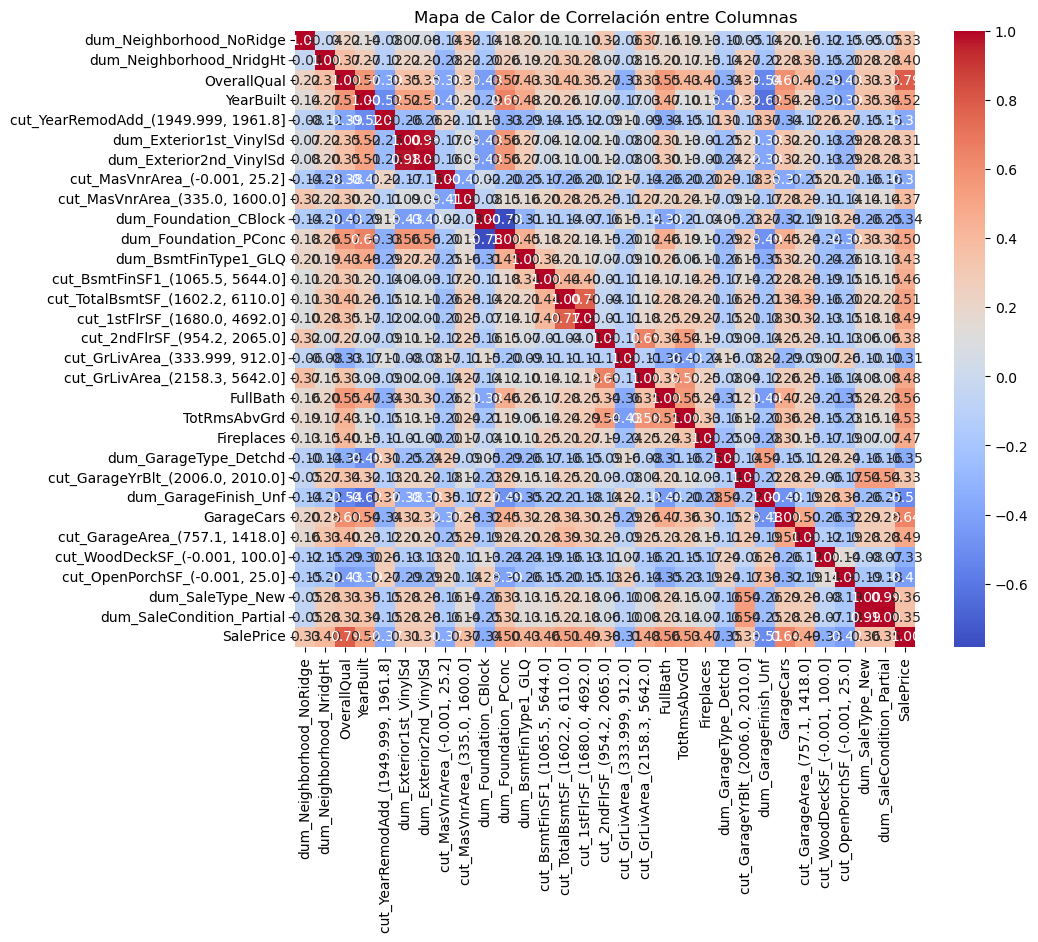

In [128]:
# Definir el tamaño del área de la figura
# Calcular la matriz de correlación
matriz_correlacion = data_modelo.corr()

plt.figure(figsize=(10, 8))  # Ajustar el tamaño del mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Columnas')
plt.show()

SEPARANDO VARIABLES PARA MODELOS

In [129]:
X = data_modelo.drop(columns='SalePrice')
y=  data_modelo['SalePrice']

In [130]:
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.4, random_state=42)

In [131]:
lm = LinearRegression()
lm.fit(X_train , y_train)

LinearRegression()

In [132]:
#Coeficientes 
coeff_df = pd.DataFrame({'Coeficientes' : lm.coef_},index=X.columns)

In [133]:
coeff_df

,Coeficientes
dum_Neighborhood_NoRidge,34341.100577
dum_Neighborhood_NridgHt,28141.054009
OverallQual,16211.526419
YearBuilt,20.347917
"cut_YearRemodAdd_(1949.999, 1961.8]",-6031.601969
dum_Exterior1st_VinylSd,-2724.766798
dum_Exterior2nd_VinylSd,843.533302
"cut_MasVnrArea_(-0.001, 25.2]",6989.846025
"cut_MasVnrArea_(335.0, 1600.0]",-101.931312
dum_Foundation_CBlock,8447.710718


In [134]:
# Predicciones
predicciones = lm.predict(X_test)

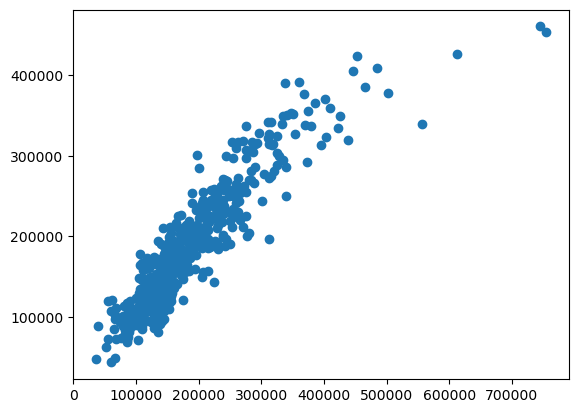

In [135]:
plt.scatter(y_test , predicciones)

C:\Users\victo\AppData\Local\Temp\ipykernel_19076\812862044.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predicciones), bins=50)
D:\Programas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

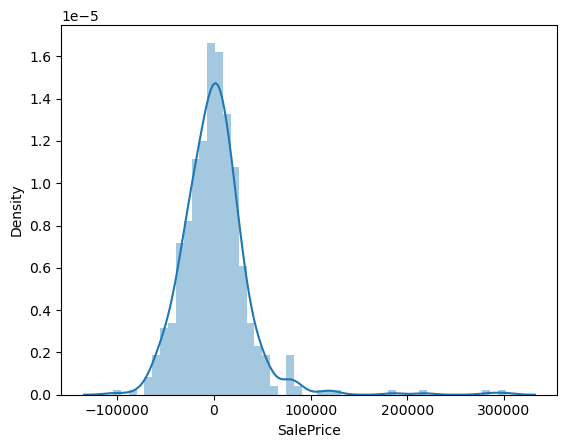

In [136]:
sns.distplot((y_test-predicciones), bins=50)
#plt.hist(y_test-predicciones, bins = 50)

(array([ 1.,  0.,  1.,  0.,  4.,  9., 15., 16., 34., 39., 53., 57., 79.,
        77., 63., 51., 29., 16., 11.,  9.,  2.,  0.,  9.,  2.,  0.,  0.,
         1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([-104394.0097676 ,  -96267.10861186,  -88140.20745612,
         -80013.30630038,  -71886.40514464,  -63759.5039889 ,
         -55632.60283316,  -47505.70167742,  -39378.80052168,
         -31251.89936594,  -23124.9982102 ,  -14998.09705446,
          -6871.19589873,    1255.70525701,    9382.60641275,
          17509.50756849,   25636.40872423,   33763.30987997,
          41890.21103571,   50017.11219145,   58144.01334719,
          66270.91450293,   74397.81565867,   82524.71681441,
          90651.61797015,   98778.51912589,  106905.42028163,
         115032.32143737,  123159.22259311,  131286.12374885,
         139413.02490459,  147539.92606033,  155666.82721607,
         163793.72837181,  171920.

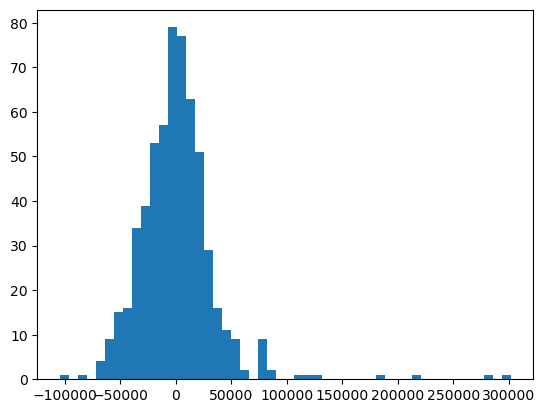

In [137]:
plt.hist((y_test-predicciones), bins = 50)

In [138]:
#Residuos  :
print('MAE :', metrics.mean_absolute_error(y_test,predicciones))
print('MSE :', metrics.mean_squared_error(y_test,predicciones))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,predicciones)))

MAE : 23396.86616155761
MSE : 1274187874.771079
RMSE : 35695.76830341489


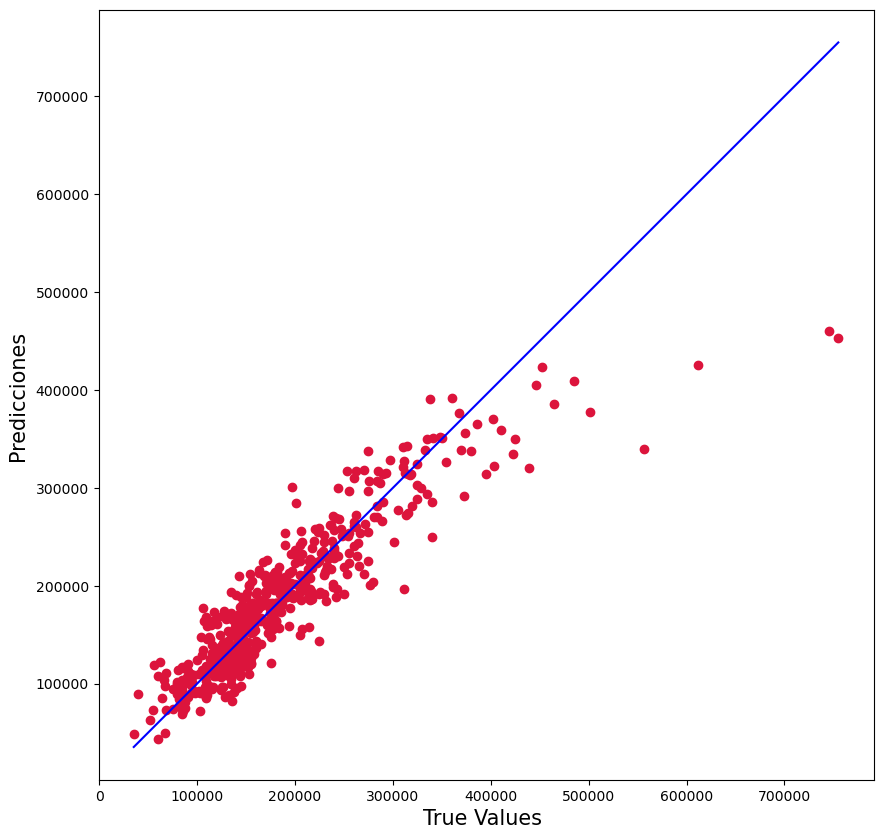

In [139]:
true_value = y_test
prediccion_value = predicciones
plt.figure(figsize=(10,10))
plt.scatter(true_value, prediccion_value, c= 'crimson')

p1 = max(max(prediccion_value), max(true_value))
p2 = min(min(prediccion_value), min(true_value))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values ', fontsize=15)
plt.ylabel('Predicciones ', fontsize=15)
plt.axis ('equal')
plt.show()